In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split,LeaveOneOut,KFold,RepeatedStratifiedKFold
from sklearn.decomposition import PCA,TruncatedSVD,NMF
%matplotlib inline
import matplotlib
#matplotlib.use('agg')
matplotlib.style.use('ggplot')
import pickle as pkl
from matplotlib import pyplot as plt
from collections import Counter
from functools import reduce
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [2]:
compounds=pd.read_csv("/data/dharp/compounding/datasets/compounds_reduced.csv",sep="\t",index_col=0)
compounds=compounds.query('decade != 2000')
compounds=compounds.reindex()
compounds

/data/dharp/packages/miniconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,modifier,head,decade,context,count,compounds
0,a_n,aaaaa_n,1960,a_n,9,a_n aaaaa_n
1,a_n,aaaaa_n,1970,a_n,10,a_n aaaaa_n
2,a_n,aaaaa_n,1980,a_n,9,a_n aaaaa_n
3,a_n,aaaaa_n,1990,a_n,14,a_n aaaaa_n
5,a_n,addison_n,1960,publishing_n,14,a_n addison_n
6,a_n,addison_n,1970,publishing_n,48,a_n addison_n
7,a_n,addison_n,1980,publishing_n,103,a_n addison_n
8,a_n,addison_n,1990,publishing_n,98,a_n addison_n
10,a_n,addison_n,1960,wesley_n,14,a_n addison_n
11,a_n,addison_n,1970,wesley_n,48,a_n addison_n


In [3]:
heads=pd.read_csv("/data/dharp/compounding/datasets/heads_reduced.csv",sep="\t")
heads=heads.query('decade != 2000')
heads=heads.reindex()
heads

,head,decade,context,count
0,a_n,1800,a_a,4
1,a_n,1810,a_a,20
2,a_n,1820,a_a,10
3,a_n,1830,a_a,14
4,a_n,1840,a_a,14
5,a_n,1850,a_a,34
6,a_n,1860,a_a,52
7,a_n,1870,a_a,14
8,a_n,1880,a_a,23
9,a_n,1890,a_a,30


In [4]:
modifiers=pd.read_csv("/data/dharp/compounding/datasets/modifiers_reduced.csv",sep="\t")
modifiers=modifiers.query('decade != 2000')
modifiers=modifiers.reindex()
modifiers

,modifier,decade,context,count
0,a_n,1830,a_n,1
1,a_n,1870,a_n,1
2,a_n,1880,a_n,3
3,a_n,1890,a_n,1
4,a_n,1900,a_n,1
5,a_n,1910,a_n,2
6,a_n,1920,a_n,15
7,a_n,1930,a_n,34
8,a_n,1940,a_n,13
9,a_n,1950,a_n,39


In [5]:
compound_decade_counts=compounds.groupby(['decade'])['count'].sum().to_frame()
compound_decade_counts.columns=['N']
compound_decade_counts

,N
decade,
1800,1299884
1810,2183326
1820,3456974
1830,4890701
1840,6562000
1850,10533767
1860,9437783
1870,12216442
1880,18060550


## PPMI , LMI, LL

In [6]:
XY=compounds.groupby(['modifier','head','decade'])['count'].sum().to_frame()
XY.columns=['a']
X_star=compounds.groupby(['modifier','decade'])['count'].sum().to_frame()
X_star.columns=['x_star']
Y_star=compounds.groupby(['head','decade'])['count'].sum().to_frame()
Y_star.columns=['star_y']
merge1=pd.merge(XY.reset_index(),X_star.reset_index(),on=['modifier','decade'])
information_feat=pd.merge(merge1,Y_star.reset_index(),on=['head','decade'])
information_feat['b']=information_feat['x_star']-information_feat['a']
information_feat['c']=information_feat['star_y']-information_feat['a']
information_feat=pd.merge(information_feat,compound_decade_counts.reset_index(),on=['decade'])
information_feat['d']=information_feat['N']-(information_feat['a']+information_feat['b']+information_feat['c'])
information_feat['x_bar_star']=information_feat['N']-information_feat['x_star']
information_feat['star_y_bar']=information_feat['N']-information_feat['star_y']
#information_feat['LR']=-2*np.sum(information_feat['a']*np.log2((information_feat['a']*information_feat['N'])/(information_feat['x_star']*information_feat['star_y'])))
information_feat.set_index(['modifier','head','decade'],inplace=True)
information_feat.replace(0,0.001,inplace=True)
information_feat['log_ratio']=2*(information_feat['a']*np.log((information_feat['a']*information_feat['N'])/(information_feat['x_star']*information_feat['star_y']))+\
information_feat['b']*np.log((information_feat['b']*information_feat['N'])/(information_feat['x_star']*information_feat['star_y_bar']))+\
information_feat['c']*np.log((information_feat['c']*information_feat['N'])/(information_feat['x_bar_star']*information_feat['star_y']))+\
information_feat['d']*np.log((information_feat['d']*information_feat['N'])/(information_feat['x_bar_star']*information_feat['star_y_bar'])))
information_feat['ppmi']=np.log2((information_feat['a']*information_feat['N'])/(information_feat['x_star']*information_feat['star_y']))
information_feat['local_mi']=information_feat['a']*information_feat['ppmi']
information_feat.ppmi.loc[information_feat.ppmi<=0]=0
information_feat.drop(['a','x_star','star_y','b','c','d','N','d','x_bar_star','star_y_bar'],axis=1,inplace=True)
information_feat

log_ratio   ppmi  local_mi
modifier        head          decade                            
a_n             aaaaa_n       1960      165.271 13.248   119.228
                addison_n     1960      284.397  8.733   244.523
adherents_n     addison_n     1960     1327.127 17.610   986.184
college_n       addison_n     1960      107.410  4.324   112.417
conceits_n      addison_n     1960      502.546 15.743   393.583
invention_n     addison_n     1960      338.137 13.010   273.200
mechanism_n     addison_n     1960      539.149 14.312   429.353
mr_n            addison_n     1960       78.429  7.078    70.780
premises_n      addison_n     1960      231.242 12.529   187.930
qualification_n addison_n     1960      263.158 11.956   215.214
secretary_n     addison_n     1960       61.417  5.837    58.367
technology_n    addison_n     1960     2608.539 10.403  2122.150
time_n          addison_n     1960       31.231  2.409    43.364
tv_n            addison_n     1960       80.196  7.206    72.062
university_n    addison_n     1960     1282.999  7.255  1117.314
view_n          addison_n     1960      128.490  7.597   113.953
a_n             anti_n        1960       95.704  3.901   105.327
allied_n        anti_n        1960      117.585  2.620   157.171
american_n      anti_n        1960    11751.163  4.307 11977.939
and_n           anti_n        1960      147.433  6.738   134.751
argentine_n     anti_n        1960      549.293  6.772   501.162
b_n             anti_n        1960     1322.081  5.026  1316.766
c_n             anti_n        1960       85.377  2.186   126.774
cabinet_n       anti_n        1960        6.678  1.125    15.752
church_n        anti_n        1960       79.801  1.806   133.676
city_n          anti_n        1960     4362.586  4.574  4454.965
community_n     anti_n        1960        7.592  0.000   -16.112
county_n        anti_n        1960     1340.658  3.839  1478.020
e_n             anti_n        1960       18.612  2.150    27.947
federal_n       anti_n        1960     4917.202  4.018  5251.219
...                                         ...    ...       ...
years_n         agathon_n     1930      883.639 10.117   637.352
                argentina_n   1930      224.383 10.117   161.867
                ethiopia_n    1930      140.231 10.117   101.167
                galvanism_n   1930      336.588 10.117   242.801
                headmaster_n  1930      238.408 10.117   171.984
                loser_n       1930      420.745 10.117   303.501
                profusion_n   1930      252.434 10.117   182.101
                tinoco_n      1930      126.206 10.117    91.050
yeomen_n        warder_n      1930      294.532 22.167   199.502
yesterday_n     whitesides_n  1930      229.208 13.776   165.318
yom_n           kippur_n      1930    11001.213 16.552  7299.510
yorker_n        cartoon_n     1930      578.576 19.555   410.664
young_n         contributor_n 1930      449.830 10.816   324.471
                czech_n       1930      749.772 10.816   540.785
                irelander_n   1930      284.877 10.816   205.498
                mccarthy_n    1930      359.854 10.816   259.577
                norval_n      1930      404.842 10.816   292.024
                winnie_n      1930     3645.974 10.816  2628.216
youth_n         aversion_n    1930      362.067 13.057   261.132
                daggoo_n      1930      778.665 13.057   561.435
                hopeful_n     1930      199.109 13.057   143.623
                hostel_n      1930     2138.636 13.057  1540.681
                partridge_n   1930      362.067 13.057   261.132
                presage_n     1930      470.724 13.057   339.472
zealand_n       paddle_n      1930      262.583 12.627   189.403
                spinach_n     1930      245.074 12.627   176.776
zeus_n          olympios_n    1930      833.800 18.061   596.003
                olympius_n    1930     1012.823 18.061   722.428
                polieus_n     1930      782.800 18.061   559.881
zone_n  

# Cosine features with PPMI

In [7]:
new_compounds=compounds.groupby(['modifier','head','context','decade'])['count'].sum().to_frame()
new_compounds.columns=['a']
compound_star=compounds.groupby(['modifier','head','decade'])['count'].sum().to_frame()
compound_star.columns=['compound_star']
context_star=compounds.groupby(['context','decade'])['count'].sum().to_frame()
context_star.columns=['context_star']
new_compounds=pd.merge(new_compounds.reset_index(),compound_star.reset_index(),on=['modifier','head','decade'])
new_compounds=pd.merge(new_compounds,context_star.reset_index(),on=['context','decade'])
new_compounds=pd.merge(new_compounds,compound_decade_counts.reset_index(),on=["decade"])
new_compounds['compound_ppmi']=np.log2((new_compounds['a']*new_compounds['N'])/(new_compounds['compound_star']*new_compounds['context_star']**0.75))
new_compounds.set_index(['modifier','head','decade'],inplace=True)
new_compounds.drop(['a','compound_star','context_star','N'],axis=1,inplace=True)
new_compounds.compound_ppmi.loc[new_compounds.compound_ppmi<=0]=0
new_compounds

context  compound_ppmi
modifier     head          decade                              
a_n          aaaaa_n       1960              a_n         15.477
             b_n           1960              a_n          9.688
             co_n          1960              a_n         15.477
             p_n           1960              a_n         14.187
             reach_n       1960              a_n         13.132
             t_n           1960              a_n          8.479
aa_n         a_n           1960              a_n         14.646
             aa_n          1960              a_n         14.501
aaa_n        a_n           1960              a_n         14.806
             aa_n          1960              a_n         15.477
             aaa_n         1960              a_n         14.849
aaaa_n       a_n           1960              a_n         15.477
academic_n   freedom_n     1960              a_n          8.718
accurate_n   description_n 1960              a_n          9.163
acetyl_n     coenzyme_n    1960              a_n         14.520
activation_n energy_n      1960              a_n          3.231
activity_n   b_n           1960              a_n         12.517
             coefficient_n 1960              a_n          6.309
actor_n      b_n           1960              a_n         12.307
air_n        force_n       1960              a_n          0.000
algebraic_n  sum_n         1960              a_n          4.915
america_n    first_n       1960              a_n          2.813
american_n   democracy_n   1960              a_n         12.236
             diplomacy_n   1960              a_n          7.599
             folklore_n    1960              a_n          7.126
             life_n        1960              a_n          7.682
             trade_n       1960              a_n          5.678
analytic_n   study_n       1960              a_n         10.477
angle_n      b_n           1960              a_n         11.379
annex_n      b_n           1960              a_n         11.017
...                                          ...            ...
word_n       right_n       1800         detest_v         16.062
             sestertius_n  1800            ass_n         16.643
words_n      butter_n      1800        parsnip_n         17.569
             dozen_n       1800    explication_n         17.371
             estate_n      1800           tail_a         16.360
work_n       will_n        1800         atkins_n         16.738
world_n      farewell_n    1800           wake_v         16.984
             instruction_n 1800           oral_a         14.908
             yield_n       1800     irrational_a         16.767
worshipful_n company_n     1800         mercer_n         16.722
                           1800        skinner_n         16.924
writer_n     notice_n      1800        heathen_a         16.360
writers_n    disdain_n     1800      byzantine_a         17.488
             instance_n    1800         faulty_a         16.786
writing_n    generation_n  1800        dulness_n         17.933
y_n          moral_n       1800       historia_n         17.006
yard_n       square_n      1800          balmy_a         17.643
years_n      b_n           1800     intermarry_v         16.965
             bishop_n      1800     epiphanius_n         15.802
                           1800          pavia_n         15.802
             captivity_n   1800        babylon_n         17.360
             war_n         1800          seven_n         15.497
yesterday_n  morning_n     1800     deliberate_v         13.102
york_n       historical_n  1800      quarterly_n         15.725
young_n      men_n         1800      organizer_n         14.725
youth_n      betimes_n     1800           mold_n         17.225
             break_n       1800         daring_a         17.517
             delight_n     1800      plaything_n         16.988
             resolve_n     1800      merciless_a         16.643
zosimus_n    form_n        1800       eusebius_n         16.810

[3567759

In [8]:
modifier_decade_counts=modifiers.groupby(['decade'])['count'].sum().to_frame()
modifier_decade_counts.columns=['N']
modifier_decade_counts

,N
decade,
1800,1875025
1810,3132730
1820,4925152
1830,7229042
1840,9705181
1850,15688004
1860,14102063
1870,17537155
1880,26200200


In [9]:
new_modifiers=modifiers.groupby(['modifier','context','decade'])['count'].sum().to_frame()
new_modifiers.columns=['a']
mod_star=modifiers.groupby(['modifier','decade'])['count'].sum().to_frame()
mod_star.columns=['mod_star']
context_star=modifiers.groupby(['context','decade'])['count'].sum().to_frame()
context_star.columns=['context_star']
merge1=pd.merge(new_modifiers.reset_index(),mod_star.reset_index(),on=['modifier','decade'])
new_modifiers=pd.merge(merge1,context_star.reset_index(),on=['context','decade'])
new_modifiers=pd.merge(new_modifiers,modifier_decade_counts.reset_index(),on=["decade"])
new_modifiers['modifier_ppmi']=np.log2((new_modifiers['a']*new_modifiers['N'])/(new_modifiers['mod_star']*new_modifiers['context_star']**0.75))
new_modifiers.set_index(['modifier','decade'],inplace=True)
new_modifiers.drop(['a','mod_star','context_star','N'],axis=1,inplace=True)
new_modifiers.modifier_ppmi.loc[new_modifiers.modifier_ppmi<=0]=0
new_modifiers

,,context,modifier_ppmi
modifier,decade,,
a_n,1830,a_n,8.587
aa_n,1830,a_n,14.910
aaa_n,1830,a_n,15.618
american_n,1830,a_n,4.552
angle_n,1830,a_n,9.568
b_n,1830,a_n,10.906
british_n,1830,a_n,1.389
c_n,1830,a_n,9.367
capital_n,1830,a_n,1.643


In [10]:
head_decade_counts=heads.groupby(['decade'])['count'].sum().to_frame()
head_decade_counts.columns=['N']
head_decade_counts

,N
decade,
1800,2169414
1810,3624671
1820,5705766
1830,8349311
1840,11093500
1850,18032240
1860,16195725
1870,20093252
1880,30018992


In [11]:
new_heads=heads.groupby(['head','context','decade'])['count'].sum().to_frame()
new_heads.columns=['a']
head_star=heads.groupby(['head','decade'])['count'].sum().to_frame()
head_star.columns=['head_star']
context_star=heads.groupby(['context','decade'])['count'].sum().to_frame()
context_star.columns=['context_star']
merge1=pd.merge(new_heads.reset_index(),head_star.reset_index(),on=['head','decade'])
new_heads=pd.merge(merge1,context_star.reset_index(),on=['context','decade'])
new_heads=pd.merge(new_heads,head_decade_counts.reset_index(),on=["decade"])
new_heads['head_ppmi']=np.log2((new_heads['a']*new_heads['N'])/(new_heads['head_star']*new_heads['context_star']**0.75))
new_heads.set_index(['head','decade'],inplace=True)
new_heads.drop(['a','head_star','context_star','N'],axis=1,inplace=True)
new_heads.head_ppmi.loc[new_heads.head_ppmi<=0]=0
new_heads

,,context,head_ppmi
head,decade,,
a_n,1800,a_a,8.938
cat_n,1800,a_a,11.915
half_n,1800,a_a,12.497
khan_n,1800,a_a,7.948
mile_n,1800,a_a,11.781
story_n,1800,a_a,11.138
tale_n,1800,a_a,8.553
thomas_n,1800,a_a,4.174
tout_n,1800,a_a,17.085


In [12]:
new_compounds=compounds.groupby(['modifier','head','context','decade'])['count'].sum().to_frame()
new_compounds.columns=['a']
compound_star=compounds.groupby(['modifier','head','decade'])['count'].sum().to_frame()
compound_star.columns=['compound_star']
context_star=compounds.groupby(['context','decade'])['count'].sum().to_frame()
context_star.columns=['context_star']
new_compounds=pd.merge(new_compounds.reset_index(),compound_star.reset_index(),on=['modifier','head','decade'])
new_compounds=pd.merge(new_compounds,context_star.reset_index(),on=['context','decade'])
new_compounds=pd.merge(new_compounds,compound_decade_counts.reset_index(),on=["decade"])
new_compounds['compound_ppmi']=np.log2((new_compounds['a']*new_compounds['N'])/(new_compounds['compound_star']*new_compounds['context_star']**0.75))
new_compounds.set_index(['modifier','head','decade'],inplace=True)
new_compounds.drop(['a','compound_star','context_star','N'],axis=1,inplace=True)
new_compounds.compound_ppmi.loc[new_compounds.compound_ppmi<=0]=0
new_compounds

context  compound_ppmi
modifier     head          decade                              
a_n          aaaaa_n       1960              a_n         15.477
             b_n           1960              a_n          9.688
             co_n          1960              a_n         15.477
             p_n           1960              a_n         14.187
             reach_n       1960              a_n         13.132
             t_n           1960              a_n          8.479
aa_n         a_n           1960              a_n         14.646
             aa_n          1960              a_n         14.501
aaa_n        a_n           1960              a_n         14.806
             aa_n          1960              a_n         15.477
             aaa_n         1960              a_n         14.849
aaaa_n       a_n           1960              a_n         15.477
academic_n   freedom_n     1960              a_n          8.718
accurate_n   description_n 1960              a_n          9.163
acetyl_n     coenzyme_n    1960              a_n         14.520
activation_n energy_n      1960              a_n          3.231
activity_n   b_n           1960              a_n         12.517
             coefficient_n 1960              a_n          6.309
actor_n      b_n           1960              a_n         12.307
air_n        force_n       1960              a_n          0.000
algebraic_n  sum_n         1960              a_n          4.915
america_n    first_n       1960              a_n          2.813
american_n   democracy_n   1960              a_n         12.236
             diplomacy_n   1960              a_n          7.599
             folklore_n    1960              a_n          7.126
             life_n        1960              a_n          7.682
             trade_n       1960              a_n          5.678
analytic_n   study_n       1960              a_n         10.477
angle_n      b_n           1960              a_n         11.379
annex_n      b_n           1960              a_n         11.017
...                                          ...            ...
word_n       right_n       1800         detest_v         16.062
             sestertius_n  1800            ass_n         16.643
words_n      butter_n      1800        parsnip_n         17.569
             dozen_n       1800    explication_n         17.371
             estate_n      1800           tail_a         16.360
work_n       will_n        1800         atkins_n         16.738
world_n      farewell_n    1800           wake_v         16.984
             instruction_n 1800           oral_a         14.908
             yield_n       1800     irrational_a         16.767
worshipful_n company_n     1800         mercer_n         16.722
                           1800        skinner_n         16.924
writer_n     notice_n      1800        heathen_a         16.360
writers_n    disdain_n     1800      byzantine_a         17.488
             instance_n    1800         faulty_a         16.786
writing_n    generation_n  1800        dulness_n         17.933
y_n          moral_n       1800       historia_n         17.006
yard_n       square_n      1800          balmy_a         17.643
years_n      b_n           1800     intermarry_v         16.965
             bishop_n      1800     epiphanius_n         15.802
                           1800          pavia_n         15.802
             captivity_n   1800        babylon_n         17.360
             war_n         1800          seven_n         15.497
yesterday_n  morning_n     1800     deliberate_v         13.102
york_n       historical_n  1800      quarterly_n         15.725
young_n      men_n         1800      organizer_n         14.725
youth_n      betimes_n     1800           mold_n         17.225
             break_n       1800         daring_a         17.517
             delight_n     1800      plaything_n         16.988
             resolve_n     1800      merciless_a         16.643
zosimus_n    form_n        1800       eusebius_n         16.810

[3567759

In [13]:
ppmi_modifier_denom=new_modifiers.groupby(['modifier',"decade"])['modifier_ppmi'].agg(lambda x: np.sqrt(np.sum(np.square(x)))).to_frame()
ppmi_modifier_denom.columns=['modifier_denom']
ppmi_modifier_denom

modifier_denom
modifier        decade                
a_n             1800            44.669
                1810            44.512
                1820            44.075
                1830            51.153
                1840            55.349
                1850            57.149
                1860            60.252
                1870            64.013
                1880            69.543
                1890            75.778
                1900            86.083
                1910            95.093
                1920           106.530
                1930           102.233
                1940           116.181
                1950           127.595
                1960           155.481
                1970           164.471
                1980           170.397
                1990           179.786
aa_n            1800            22.788
                1810            27.455
                1820            29.165
                1830            30.933
                1850            26.963
                1860            32.749
                1870            25.502
                1880            33.852
                1900            26.634
                1910            31.672
...                                ...
zwitterion_n    1950            15.483
                1960            15.660
                1970            15.739
                1980            41.333
                1990            41.324
zygapophyseal_n 1960            18.146
                1970            25.237
                1980            26.334
                1990            27.021
zygote_n        1920            15.566
                1930            15.425
                1940             9.234
                1950            15.503
                1960            16.218
                1970            16.357
                1980            16.632
                1990            16.510
zygotene_n      1950            20.667
                1960            20.656
                1970            20.908
                1980            21.089
                1990            21.443
zylobalsamum_n  1890            14.401
                1900            14.761
                1910            15.062
                1920            15.196
                1930            15.322
                1960            15.989
                1970            16.388
                1990            16.717

[514067 rows x 1 columns]

In [14]:
ppmi_head_denom=new_heads.groupby(['head',"decade"])['head_ppmi'].agg(lambda x: np.sqrt(np.sum(np.square(x)))).to_frame()
ppmi_head_denom.columns=['head_denom']
ppmi_head_denom

head_denom
head          decade            
a_n           1800        72.503
              1810        79.295
              1820        84.754
              1830       101.533
              1840       106.922
              1850       125.885
              1860       127.324
              1870       137.347
              1880       146.258
              1890       157.122
              1900       166.464
              1910       166.038
              1920       173.085
              1930       174.148
              1940       178.875
              1950       192.933
              1960       214.495
              1970       223.955
              1980       239.250
              1990       256.607
aa_n          1800        29.662
              1810        28.578
              1820        33.086
              1830        37.601
              1840        30.884
              1850        38.468
              1860        37.644
              1870        43.312
              1880        47.619
              1890        39.859
...                          ...
zvezda_n      1970        32.956
              1980        33.092
              1990        27.943
zvi_n         1940        26.484
              1950        33.043
              1960        36.612
              1970        40.336
              1980        42.127
              1990        39.096
zwingli_n     1850        18.500
              1860        26.274
              1870        29.673
              1880        26.850
              1890        36.505
              1900        44.963
              1910        44.608
              1920        44.187
              1930        39.845
              1940        44.450
              1950        52.369
              1960        51.063
              1970        53.001
              1980        53.718
              1990        53.128
zygmunt_n     1990        24.368
zygomycetes_n 1970        13.367
              1980        13.760
              1990        14.112
zygote_n      1980        19.426
              1990        26.868

[586758 rows x 1 columns]

In [15]:
ppmi_compound_denom=new_compounds.groupby(['modifier','head',"decade"])['compound_ppmi'].agg(lambda x: np.sqrt(np.sum(np.square(x)))).to_frame()
ppmi_compound_denom.columns=['compound_denom']
ppmi_compound_denom

compound_denom
modifier        head           decade                
a_n             aaaaa_n        1960            15.477
                               1970            15.714
                               1980            15.929
                               1990            16.248
                addison_n      1960            24.263
                               1970            24.693
                               1980            25.138
                               1990            25.174
                anti_n         1960            15.669
                               1970            15.736
                               1980            15.683
                               1990            15.940
                archive_n      1960            31.870
                               1970            31.227
                               1980            30.574
                               1990            31.196
                atom_n         1940             9.085
                               1950            16.873
                               1960            17.687
                               1970            18.275
                               1980            18.831
                               1990            19.115
                b_n            1800            17.160
                               1810            25.090
                               1820            21.518
                               1830            30.851
                               1840            33.911
                               1850            33.714
                               1860            35.573
                               1870            32.962
...                                               ...
zurich_n        government_n   1900            27.675
                               1910            27.748
                               1950            28.176
                               1960            29.282
                seminar_n      1970            25.369
                               1980            25.302
                               1990            28.815
zwemmer_n       gallery_n      1960            23.801
                               1970            24.115
                               1980            24.573
                               1990            24.914
zwinglische_n   reformation_n  1980            20.465
                               1990            20.188
zwitterion_n    form_n         1970            15.705
                intermediate_n 1990            28.939
                mechanism_n    1990            15.023
                route_n        1990            29.467
zygapophyseal_n joint_n        1980            25.663
                               1990            28.781
zygote_n        nucleus_n      1970             9.825
                result_n       1960            19.534
                               1970            19.916
                               1980            20.223
                               1990            20.601
zygotene_n      stage_n        1960            20.411
                               1970            20.673
                               1980            20.935
                               1990            21.264
zylobalsamum_n  process_n      1890            14.226
                               1920            14.975

[3781847 rows x 1 columns]

### Similarity between Modifier and Compound

In [16]:
ppmi_compound_modifier_sim=pd.merge(new_compounds.reset_index(),new_modifiers.reset_index(),on=["modifier","context","decade"])
#merge2=pd.merge(merge1,compound_denom.reset_index(),on=["modifier","head","decade"])
#ppmi_compound_modifier_sim=pd.merge(merge2,modifier_denom.reset_index(),on=["modifier","decade"])
#ppmi_compound_modifier_sim['sim_with_head']=
ppmi_compound_modifier_sim['numerator']=ppmi_compound_modifier_sim['compound_ppmi']*ppmi_compound_modifier_sim['modifier_ppmi']
ppmi_compound_modifier_sim=ppmi_compound_modifier_sim.groupby(['modifier','head','decade'])['numerator'].sum().to_frame()
ppmi_compound_modifier_sim=pd.merge(ppmi_compound_modifier_sim.reset_index(),ppmi_compound_denom.reset_index(),on=["modifier","head","decade"])
ppmi_compound_modifier_sim=pd.merge(ppmi_compound_modifier_sim,ppmi_modifier_denom.reset_index(),on=['modifier','decade'])
ppmi_compound_modifier_sim['sim_with_modifier']=ppmi_compound_modifier_sim['numerator']/(ppmi_compound_modifier_sim['compound_denom']*ppmi_compound_modifier_sim['modifier_denom'])
ppmi_compound_modifier_sim.set_index(['modifier','head','decade'],inplace=True)
ppmi_compound_modifier_sim.drop(['numerator','compound_denom'],axis=1,inplace=True)
ppmi_compound_modifier_sim

modifier_denom  sim_with_modifier
modifier        head           decade                                   
a_n             aaaaa_n        1960           155.481              0.059
                addison_n      1960           155.481              0.049
                anti_n         1960           155.481              0.072
                archive_n      1960           155.481              0.102
                atom_n         1960           155.481              0.064
                b_n            1960           155.481              0.257
                band_n         1960           155.481              0.069
                bell_n         1960           155.481              0.105
                bibliography_n 1960           155.481              0.152
                bill_n         1960           155.481              0.026
                briefe_n       1960           155.481              0.063
                bunch_n        1960           155.481              0.095
                c_n            1960           155.481              0.119
                calendar_n     1960           155.481              0.032
                campaign_n     1960           155.481              0.025
                cell_n         1960           155.481              0.046
                century_n      1960           155.481              0.173
                chronicle_n    1960           155.481              0.044
                co_n           1960           155.481              0.059
                code_n         1960           155.481              0.039
                coffin_n       1960           155.481              0.102
                collection_n   1960           155.481              0.077
                commentary_n   1960           155.481              0.011
                connecticut_n  1960           155.481              0.061
                corporation_n  1960           155.481              0.078
                council_n      1960           155.481              0.091
                cross_n        1960           155.481              0.039
                daily_n        1960           155.481              0.150
                decade_n       1960           155.481              0.044
                description_n  1960           155.481              0.045
...                                               ...                ...
zurich_n        government_n   1840            22.649              0.852
                               1850            24.643              0.878
                               1860            30.908              0.643
                               1870            34.284              0.535
                               1890            39.644              0.511
                               1900            44.305              0.414
                               1910            47.457              0.377
zwemmer_n       gallery_n      1960            23.713              1.000
                               1970            23.910              1.000
                               1980            24.301              1.000
                               1990            24.551              1.000
zwinglische_n   reformation_n  1980            19.809              1.000
                               1990            19.282              1.000
zwitterion_n    form_n         1970            15.739              1.000
                intermediate_n 1990            41.324              0.642
                mechanism_n    1990            41.324              0.313
                route_n        1990            41.324              0.665
zygapophyseal_n joint_n        1980            26.334              1.000
                               1990            27.021              0.910
zygote_n        nucleus_n      1970            16.357              0.559
                result_n       1970            16.357              0.580
                               1960            16.218              0.573
                        

In [17]:
ppmi_compound_modifier_sim.sim_with_modifier.describe()

count   3734422.000
mean          0.187
std           0.210
min           0.000
25%           0.058
50%           0.108
75%           0.221
max           1.000
Name: sim_with_modifier, dtype: float64

/data/dharp/packages/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


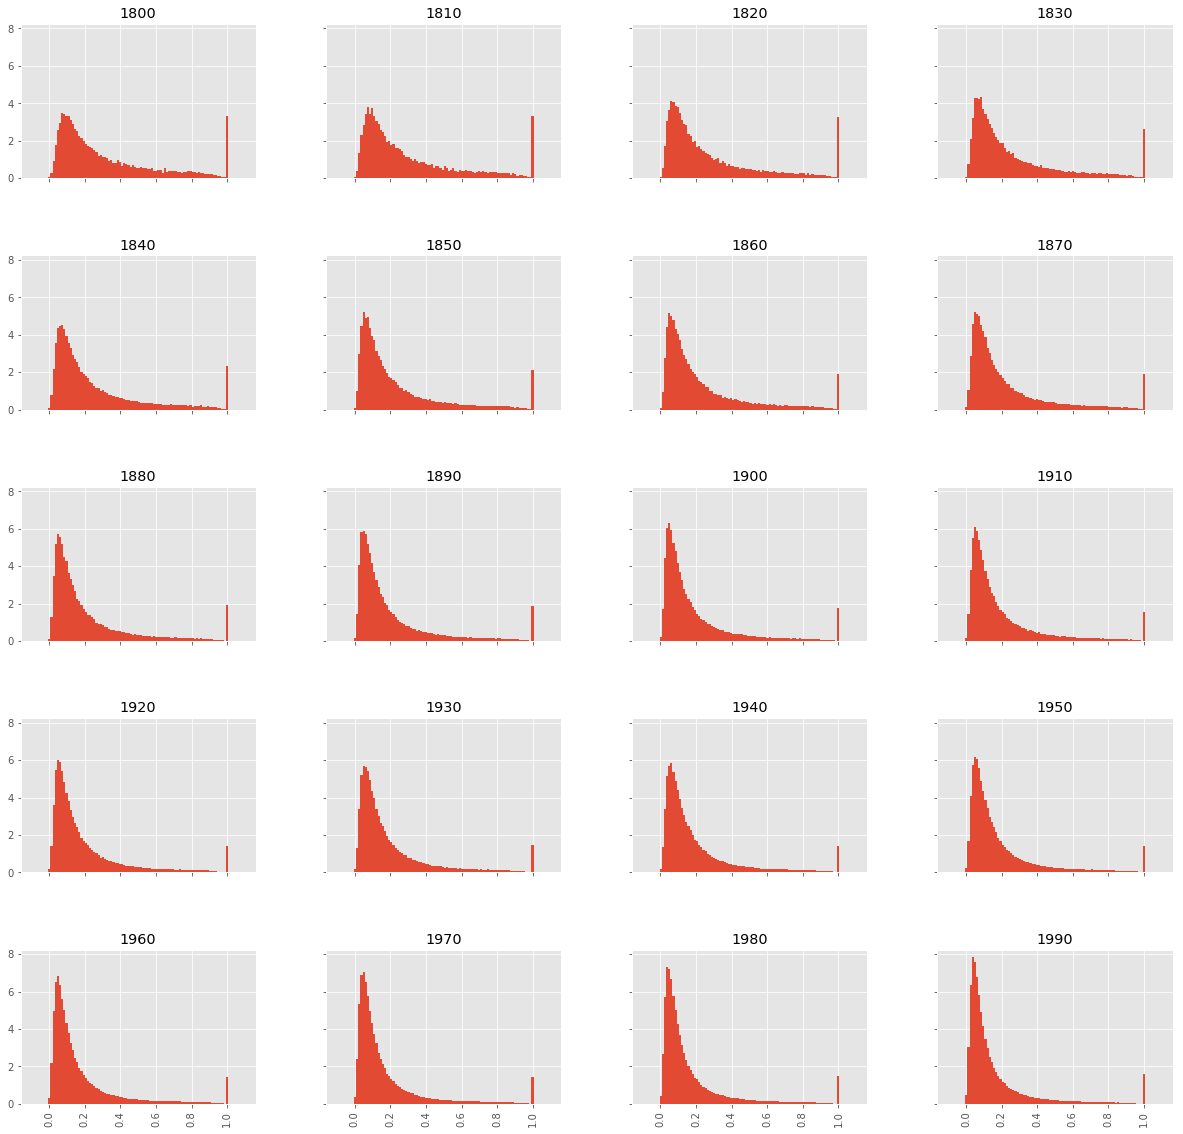

In [18]:
_=ppmi_compound_modifier_sim.hist(by= 'decade',column ='sim_with_modifier', figsize=(20, 20),bins=100,sharex=True,sharey=True,normed=True,range=(-0.1,1.1))

### Similarity between Head and Compound

In [19]:
ppmi_compound_head_sim=pd.merge(new_compounds.reset_index(),new_heads.reset_index(),on=["head","context","decade"])

ppmi_compound_head_sim['numerator']=ppmi_compound_head_sim['compound_ppmi']*ppmi_compound_head_sim['head_ppmi']
ppmi_compound_head_sim=ppmi_compound_head_sim.groupby(['modifier','head','decade'])['numerator'].sum().to_frame()
ppmi_compound_head_sim=pd.merge(ppmi_compound_head_sim.reset_index(),ppmi_compound_denom.reset_index(),on=["modifier","head","decade"])
ppmi_compound_head_sim=pd.merge(ppmi_compound_head_sim,ppmi_head_denom.reset_index(),on=['head','decade'])
ppmi_compound_head_sim['sim_with_head']=ppmi_compound_head_sim['numerator']/(ppmi_compound_head_sim['compound_denom']*ppmi_compound_head_sim['head_denom'])
ppmi_compound_head_sim.set_index(['modifier','head','decade'],inplace=True)
ppmi_compound_head_sim.drop(['numerator','compound_denom'],axis=1,inplace=True)
ppmi_compound_head_sim

head_denom  sim_with_head
modifier        head          decade                           
a_n             aaaaa_n       1960        15.970          1.000
                              1970        16.136          1.000
                              1980        16.288          1.000
                              1990        16.553          1.000
                addison_n     1960        92.298          0.232
adherents_n     addison_n     1960        92.298          0.200
college_n       addison_n     1960        92.298          0.232
conceits_n      addison_n     1960        92.298          0.185
invention_n     addison_n     1960        92.298          0.165
mechanism_n     addison_n     1960        92.298          0.165
mr_n            addison_n     1960        92.298          0.079
premises_n      addison_n     1960        92.298          0.150
qualification_n addison_n     1960        92.298          0.110
secretary_n     addison_n     1960        92.298          0.104
technology_n    addison_n     1960        92.298          0.271
time_n          addison_n     1960        92.298          0.164
tv_n            addison_n     1960        92.298          0.232
university_n    addison_n     1960        92.298          0.236
view_n          addison_n     1960        92.298          0.089
a_n             addison_n     1970        85.108          0.261
adherents_n     addison_n     1970        85.108          0.204
college_n       addison_n     1970        85.108          0.261
conceits_n      addison_n     1970        85.108          0.202
technology_n    addison_n     1970        85.108          0.290
tv_n            addison_n     1970        85.108          0.261
university_n    addison_n     1970        85.108          0.267
a_n             addison_n     1980        83.640          0.269
conceits_n      addison_n     1980        83.640          0.170
group_n         addison_n     1980        83.640          0.281
invention_n     addison_n     1980        83.640          0.166
...                                          ...            ...
zocor_n         zocor_n       1990        25.334          1.000
zone_n          aride_n       1960        26.143          1.000
                              1970        26.433          1.000
                              1980        26.933          1.000
                contigue_n    1940        16.094          1.000
                              1960        15.932          1.000
                              1970        16.134          1.000
                              1980        16.359          1.000
                              1990        16.739          1.000
                flung_n       1830        22.689          1.000
                              1840        23.035          1.000
                              1860        23.240          1.000
                              1870        27.257          0.859
                              1900        23.806          1.000
                homologue_n   1930        15.746          1.000
                              1940        16.094          1.000
                              1950        16.457          0.970
                              1960        15.932          1.000
                              1980        24.516          0.654
                ophiolites_n  1990        23.756          1.000
                residuum_n    1960        39.938          0.583
                              1980        32.574          0.736
                              1990        41.055          0.587
zones_n         arides_n      1970        22.978          1.000
                synaptiques_n 1960        25.856          1.000
                              1970        26.283          1.000
                              1980        26.723          1.000
zoo_n           pottet_n      1900        20.361          1.000
zoology_n       riley_n       1940        67.239          0.196
zooplankton_n   biomass_n     1950        34.525          0.646

[3781

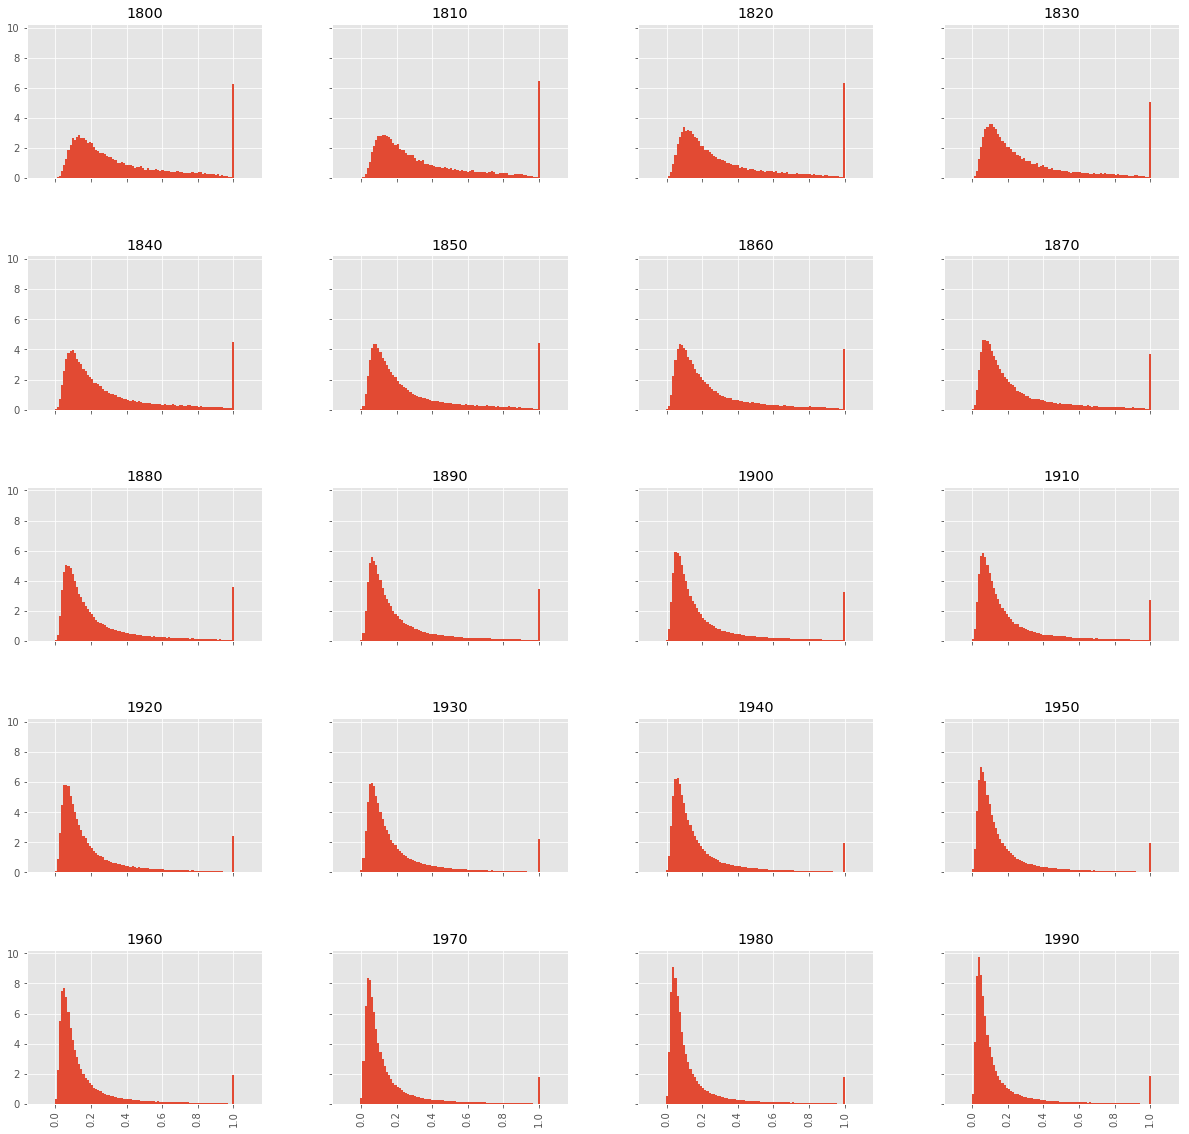

In [20]:
_=ppmi_compound_head_sim.hist(by= 'decade',column ='sim_with_head', figsize=(20, 20),bins=100,sharex=True,sharey=True,normed=True,range=(-0.1,1.1))

In [21]:
ppmi_constituent_sim=pd.merge(new_heads.reset_index(),new_compounds.reset_index(),on=["head","context","decade"])
ppmi_constituent_sim=pd.merge(ppmi_constituent_sim,new_modifiers.reset_index(),on=["modifier","context","decade"])
ppmi_constituent_sim['numerator']=ppmi_constituent_sim['head_ppmi']*ppmi_constituent_sim['modifier_ppmi']
ppmi_constituent_sim=ppmi_constituent_sim.groupby(['modifier','head','decade'])['numerator'].sum().to_frame()
ppmi_constituent_sim=pd.merge(ppmi_constituent_sim.reset_index(),ppmi_head_denom.reset_index(),on=["head","decade"])
ppmi_constituent_sim=pd.merge(ppmi_constituent_sim,ppmi_modifier_denom.reset_index(),on=["modifier","decade"])
ppmi_constituent_sim['sim_bw_constituents']=ppmi_constituent_sim['numerator']/(ppmi_constituent_sim['head_denom']*ppmi_constituent_sim['modifier_denom'])
ppmi_constituent_sim.set_index(['modifier','head','decade'],inplace=True)
ppmi_constituent_sim.drop(['numerator','modifier_denom','head_denom'],axis=1,inplace=True)
ppmi_constituent_sim

sim_bw_constituents
modifier      head           decade                     
a_n           aaaaa_n        1960                  0.059
              addison_n      1960                  0.012
              anti_n         1960                  0.005
              archive_n      1960                  0.014
              atom_n         1960                  0.003
              b_n            1960                  0.044
              band_n         1960                  0.005
              bell_n         1960                  0.007
              bibliography_n 1960                  0.058
              bill_n         1960                  0.001
              briefe_n       1960                  0.036
              bunch_n        1960                  0.028
              c_n            1960                  0.013
              calendar_n     1960                  0.004
              campaign_n     1960                  0.001
              cell_n         1960                  0.004
              century_n      1960                  0.019
              chronicle_n    1960                  0.004
              co_n           1960                  0.002
              code_n         1960                  0.003
              coffin_n       1960                  0.017
              collection_n   1960                  0.005
              commentary_n   1960                  0.004
              connecticut_n  1960                  0.012
              corporation_n  1960                  0.002
              council_n      1960                  0.003
              cross_n        1960                  0.003
              daily_n        1960                  0.026
              decade_n       1960                  0.007
              description_n  1960                  0.005
...                                                  ...
yom_n         kippur_n       1890                  0.999
                             1900                  1.000
                             1910                  0.978
                             1920                  0.986
                             1930                  0.992
                             1940                  0.983
                             1950                  0.979
                             1960                  0.967
                             1970                  0.972
                             1980                  0.976
                             1990                  0.974
yonder_n      copse_n        1860                  0.465
younger_n     pliny_n        1820                  0.681
yucca_n       pollination_n  1890                  0.771
                             1910                  0.542
zeiss_n       binoculars_n   1940                  0.437
                             1970                  0.235
              counting_n     1910                  0.428
zeus_n        olympius_n     1840                  0.501
                             1850                  0.299
                             1860                  0.304
zhuhai_n      sezs_n         1980                  0.701
                             1990                  0.678
zinovievite_n terrorist_n    1940                  0.689
                             1950                  0.559
zone_n        flung_n        1830                  1.000
                             1860                  0.802
                             1870                  0.700
zoo_n         pottet_n       1900                  1.000
zoot_n        sims_n         1960                  0.509

[3734422 rows x 1 columns]

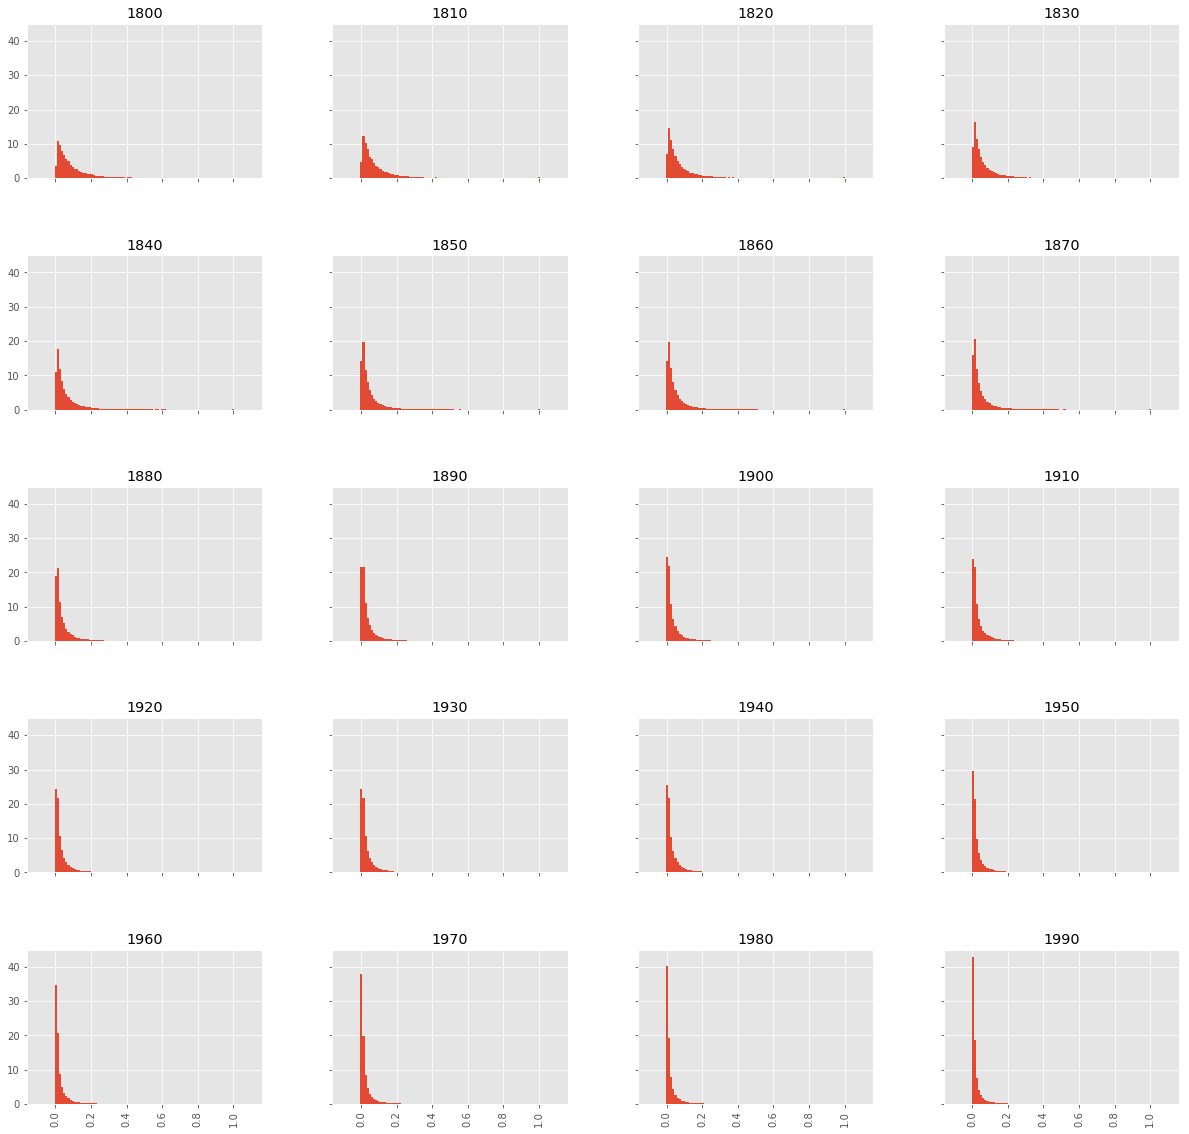

In [22]:
_=ppmi_constituent_sim.hist(by= 'decade',column ='sim_bw_constituents', figsize=(20, 20),bins=100,sharex=True,sharey=True,normed=True,range=(-0.1,1.1))

In [23]:
dfs = [ppmi_constituent_sim.reset_index(), ppmi_compound_head_sim.reset_index(), ppmi_compound_modifier_sim.reset_index(), information_feat.reset_index()]
compounds_final = reduce(lambda left,right: pd.merge(left,right,on=['modifier','head','decade']), dfs)
compounds_final.drop(['head_denom','modifier_denom'],axis=1,inplace=True)
compounds_final=pd.pivot_table(compounds_final, index=['modifier','head'], columns=['decade'])
compounds_final.fillna(0,inplace=True)
compounds_final -= compounds_final.min()
compounds_final /= compounds_final.max()
compounds_final_1=compounds_final.columns.get_level_values(0)
compounds_final_2=compounds_final.columns.get_level_values(1)

cur_year=0
new_columns=[]
for year in compounds_final_2:
    new_columns.append(str(year)+"_"+compounds_final_1[cur_year])
    cur_year+=1
compounds_final.columns=new_columns
compounds_final

1800_local_mi  1810_local_mi  1820_local_mi  \
modifier        head                                                          
a_n             aaaaa_n                 0.006          0.005          0.004   
                addison_n               0.006          0.005          0.004   
                anti_n                  0.006          0.005          0.004   
                archive_n               0.006          0.005          0.004   
                atom_n                  0.006          0.005          0.004   
                b_n                     0.007          0.008          0.006   
                band_n                  0.006          0.005          0.004   
                baseball_n              0.006          0.005          0.004   
                behavior_n              0.006          0.005          0.004   
                bell_n                  0.006          0.005          0.004   
                berkley_n               0.006          0.005          0.004   
                bibliography_n          0.006          0.005          0.004   
                bill_n                  0.006          0.005          0.004   
                bird_n                  0.006          0.005          0.004   
                board_n                 0.006          0.005          0.004   
                book_n                  0.006          0.005          0.004   
                boswell_n               0.006          0.005          0.004   
                brand_n                 0.006          0.005          0.004   
                briefe_n                0.006          0.005          0.004   
                bunch_n                 0.006          0.005          0.004   
                burn_n                  0.006          0.005          0.004   
                c_n                     0.010          0.006          0.004   
                calendar_n              0.006          0.005          0.004   
                call_n                  0.006          0.005          0.004   
                campaign_n              0.006          0.005          0.004   
                cassell_n               0.006          0.005          0.004   
                cat_n                   0.006          0.005          0.004   
                cataloguing_n           0.006          0.005          0.004   
                cell_n                  0.006          0.005          0.004   
                century_n               0.006          0.005          0.004   
...                                       ...            ...            ...   
zuni_n          mountain_n              0.006          0.005          0.004   
                origin_n                0.006          0.005          0.004   
                prehistory_n            0.006          0.005          0.004   
                religion_n              0.006          0.005          0.004   
                ruin_n                  0.006          0.005          0.004   
                sacred_n                0.006          0.005          0.004   
                social_n                0.006          0.005          0.004   
                tradition_n             0.006          0.005          0.004   
                tribe_n                 0.006          0.005          0.004   
                village_n               0.006          0.005          0.004   
                war_n                   0.006          0.005          0.004   
                word_n                  0.006          0.005          0.004   
zunyi_n         conference_n            0.006          0.005          0.004   
zurich_n        acm_n                   0.006          0.005          0.004   
                agreement_n             0.006          0.005          0.004   
                chamber_n               0.006          0.005          0.004   
                conference_n            0.006          0.005          0.004   
                government_n            0.006          0.005          0.004   
   

In [25]:
compounds_final.to_csv("/data/dharp/compounding/datasets/dist_sem_dec.csv")

In [24]:
new_heads=new_heads.reset_index(inplace=True)
new_heads.columns=['constituent','decade','context','ppmi']
new_heads['constituent']=new_heads['constituent'].str.replace(r'_n$', r'_h', regex=True)
new_heads.shape

,,context,modifier_ppmi
modifier,decade,,
a_n,1830,a_n,8.587
aa_n,1830,a_n,14.910
aaa_n,1830,a_n,15.618
american_n,1830,a_n,4.552
angle_n,1830,a_n,9.568
b_n,1830,a_n,10.906
british_n,1830,a_n,1.389
c_n,1830,a_n,9.367
capital_n,1830,a_n,1.643
